# Loss Functions, Bias and Variance

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import pandas as pd
import numpy as np

In [3]:
from IPython.display import Image
width=800; height=500
dir_path = r'D:\ASSIST\img\aSSIST_20220111_1학기_조상구'

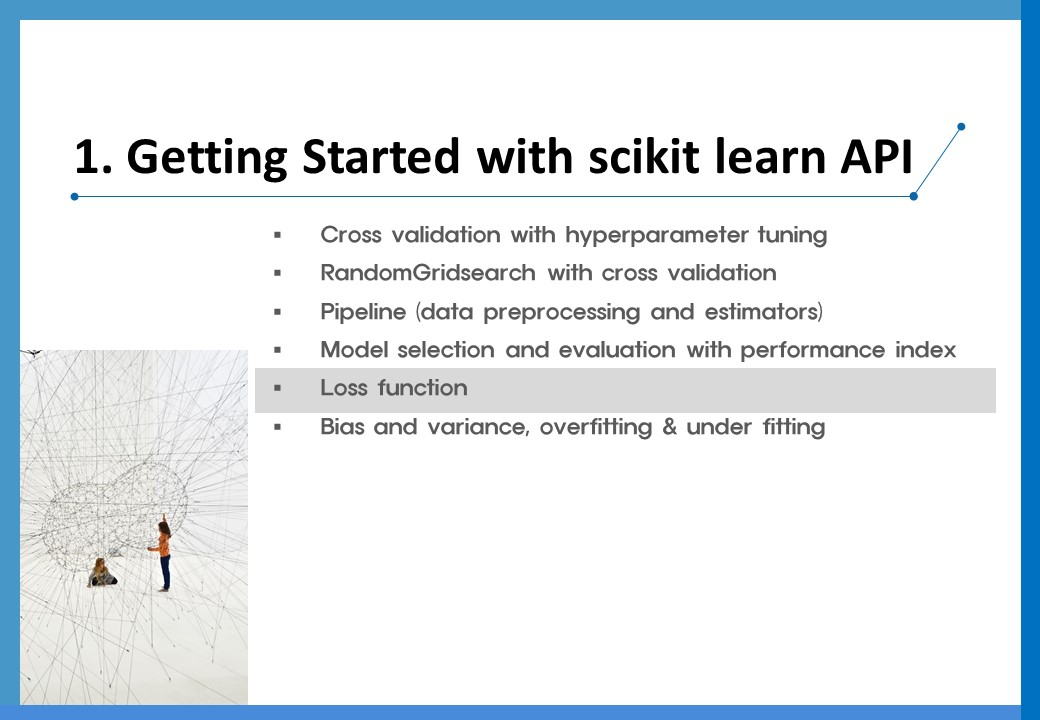

In [4]:
Image(filename=dir_path + '/슬라이드45.jpg', width=width, height=height)

# 1. 손실함수(Loss Functions)

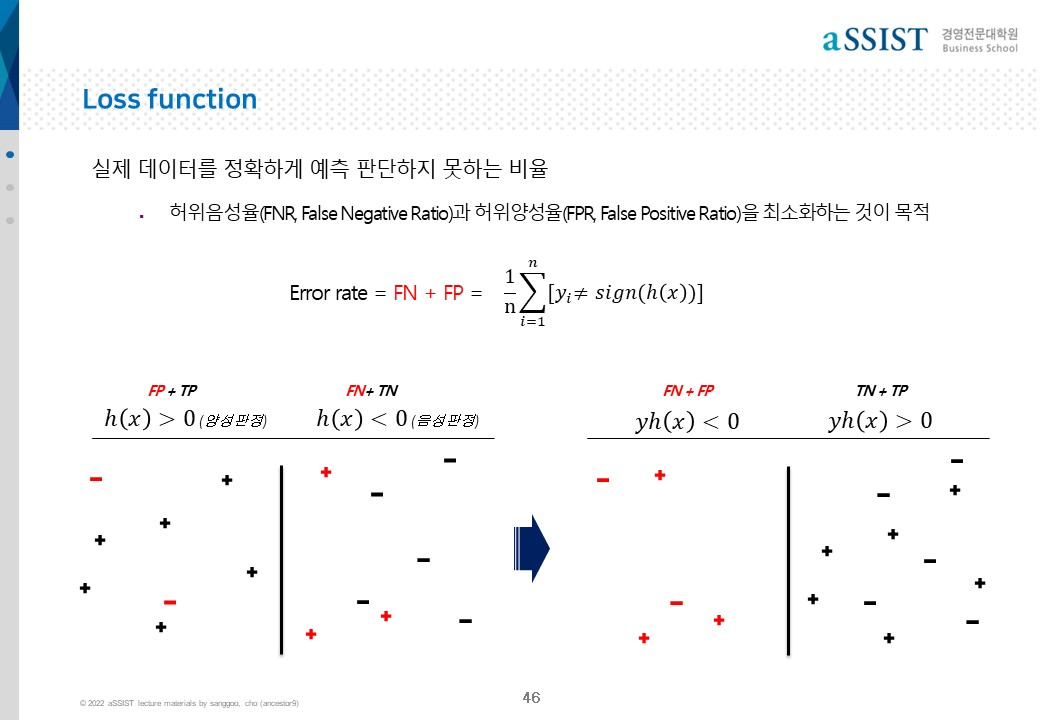

In [5]:
Image(filename=dir_path + '/슬라이드46.jpg', width=width, height=height)

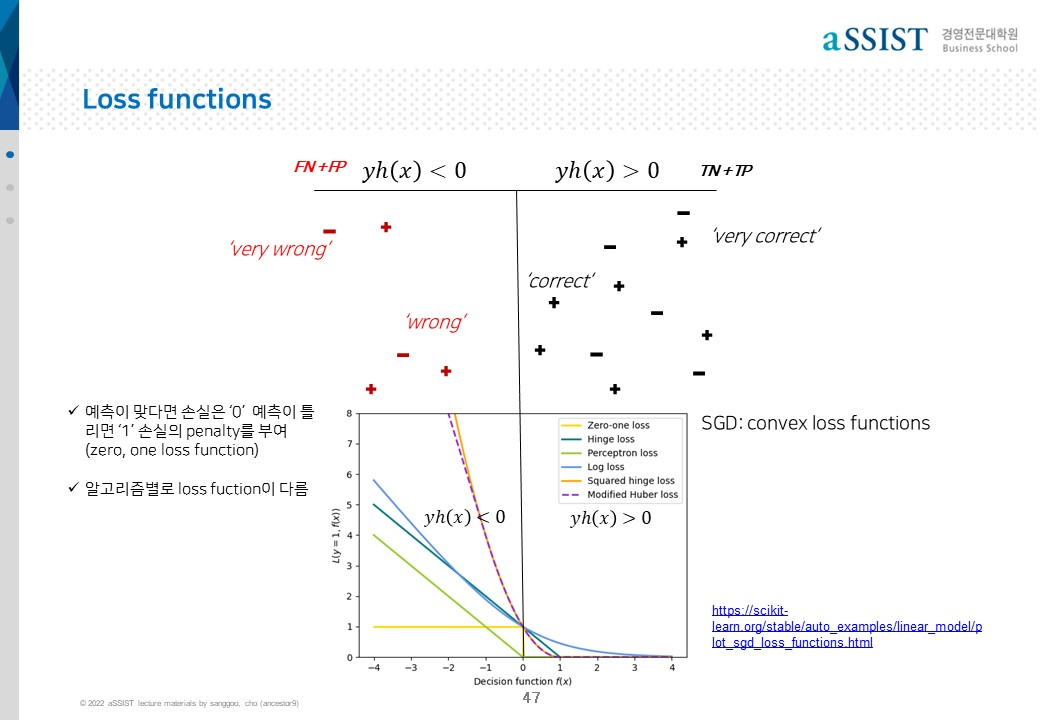

In [6]:
Image(filename=dir_path + '/슬라이드47.jpg', width=width, height=height)

(0.0, 8.0)

Text(0.5, 0, 'Decision function $f(x)$')

Text(0, 0.5, '$L(y=1, f(x))$')

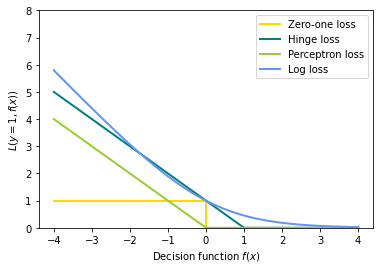

In [7]:
xmin, xmax = -4, 4
xx = np.linspace(xmin, xmax, 100)
lw = 2
plt.plot([xmin, 0, 0, xmax], [1, 1, 0, 0], color="gold", lw=lw, label="Zero-one loss")
plt.plot(xx, np.where(xx < 1, 1 - xx, 0), color="teal", lw=lw, label="Hinge loss")
plt.plot(xx, -np.minimum(xx, 0), color="yellowgreen", lw=lw, label="Perceptron loss")
plt.plot(xx, np.log2(1 + np.exp(-xx)), color="cornflowerblue", lw=lw, label="Log loss")

plt.ylim((0, 8))
plt.legend(loc="upper right")
plt.xlabel(r"Decision function $f(x)$")
plt.ylabel("$L(y=1, f(x))$")
plt.show()

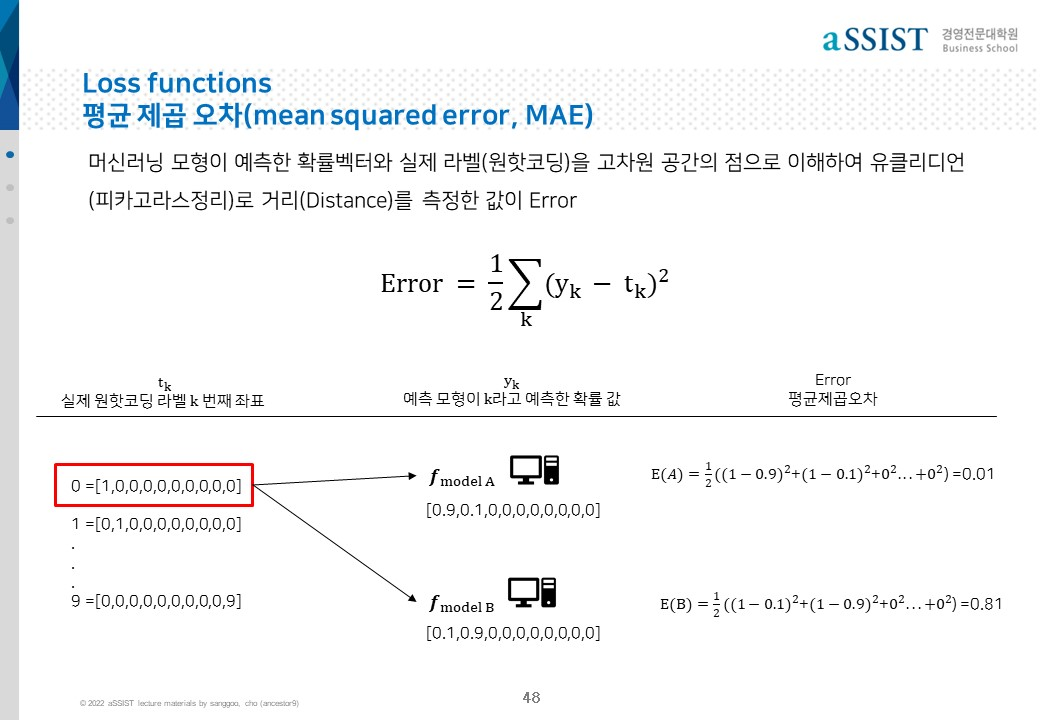

In [8]:
Image(filename=dir_path + '/슬라이드48.jpg', width=width, height=height)

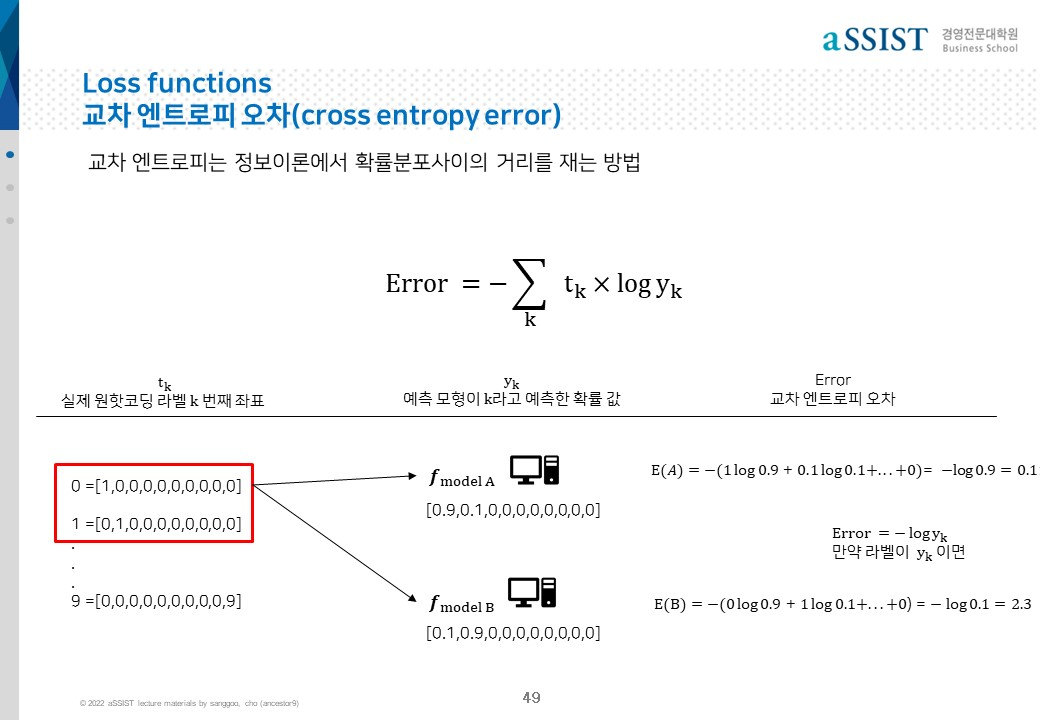

In [9]:
Image(filename=dir_path + '/슬라이드49.jpg', width=width, height=height)

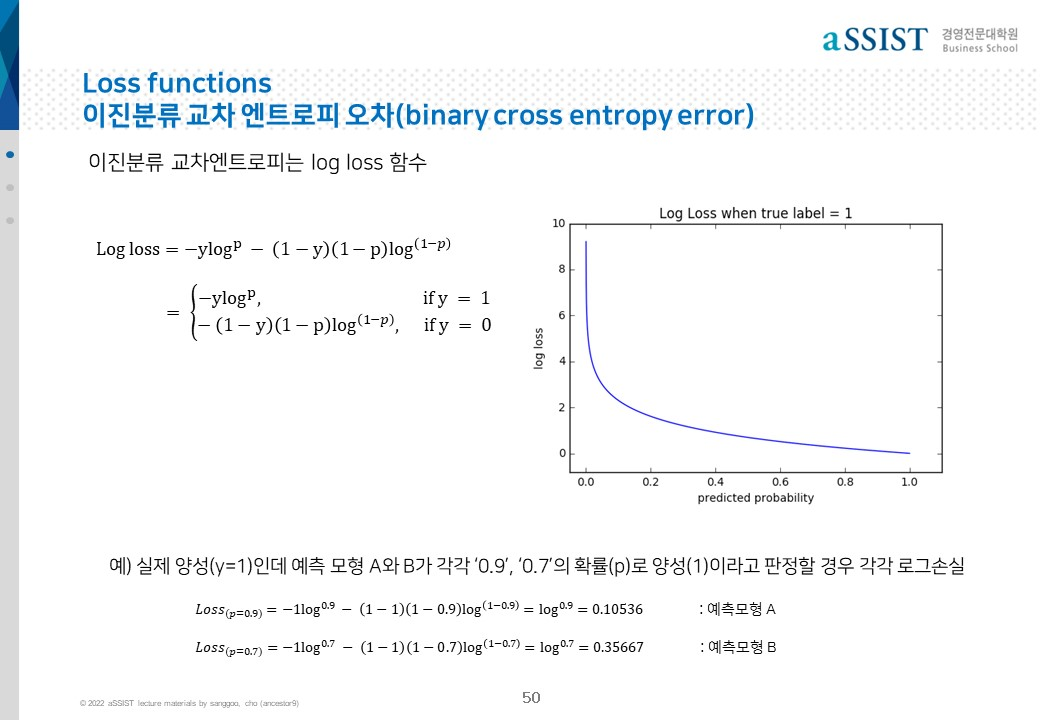

In [10]:
Image(filename=dir_path + '/슬라이드50.jpg', width=width, height=height)

In [11]:
from sklearn import datasets
X, y = datasets.load_wine(return_X_y=True, as_frame=True)
df = X.merge(y, left_index=True, right_index=True)
df.head()
df.shape

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


(178, 14)

In [12]:
df.target.value_counts(normalize=True)

1    0.398876
0    0.331461
2    0.269663
Name: target, dtype: float64

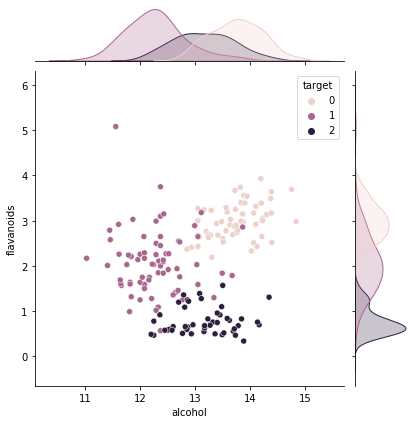

In [13]:
sns.jointplot(data=df, x='alcohol',y='flavanoids', hue='target')

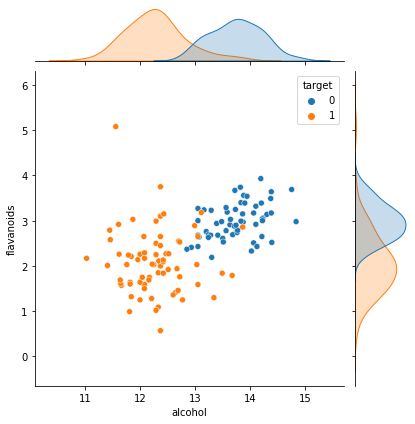

In [14]:
sns.jointplot(data=df.loc[df.target < 2, :], x='alcohol',y='flavanoids', hue='target')

In [15]:
X = df[['alcohol','flavanoids']]
y = df['target']

In [16]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
y_probas = clf.fit(X,y).predict_proba(X)

In [17]:
from sklearn.metrics import log_loss
log_loss(y, y_probas)
y_pred = clf.predict(X)
(y_pred == y).mean()

0.15355545934349846

0.9325842696629213

In [18]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
y_probas = clf.fit(X,y).predict_proba(X)
log_loss(y, y_probas)
y_pred = clf.predict(X)
(y_pred == y).mean()

0.05298042499772152

1.0

### log_loss
- Log Loss is the negative average of the log of corrected predicted probabilities for each instance
- 예측된 확률과 실제값의 차이의 log 값은 1에 가까울 수록 0에 근접
<img src ='https://editor.analyticsvidhya.com/uploads/90149Capture0.PNG'>

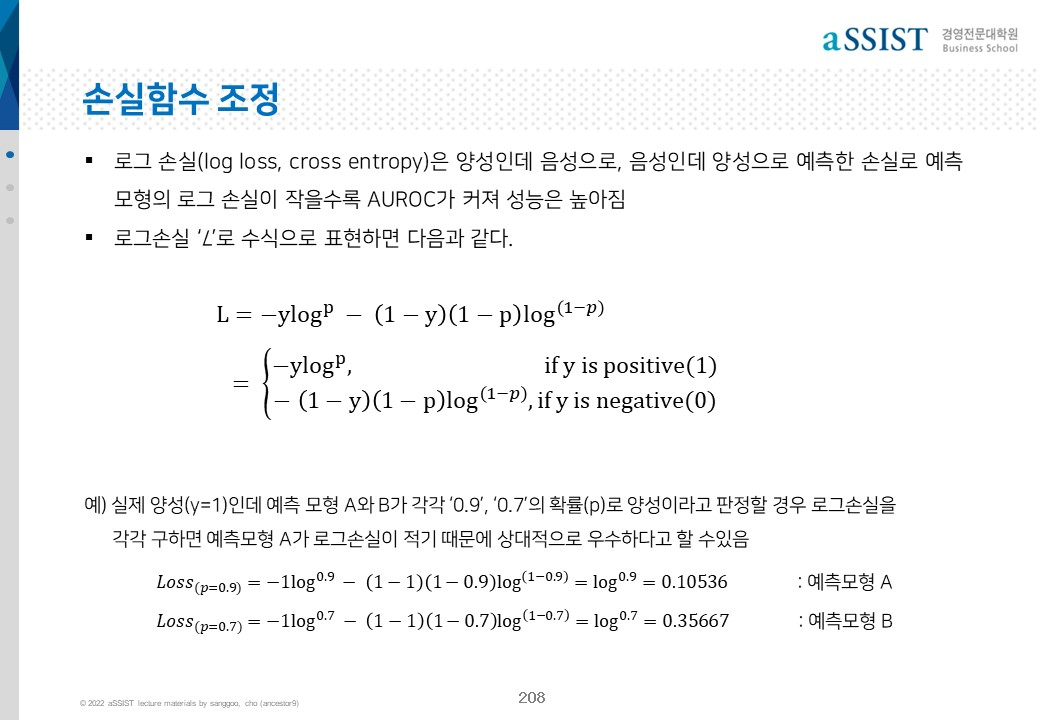

In [19]:
Image(filename=dir_path + '/슬라이드208.jpg', width=width, height=height)

# 2. 편향과 분산

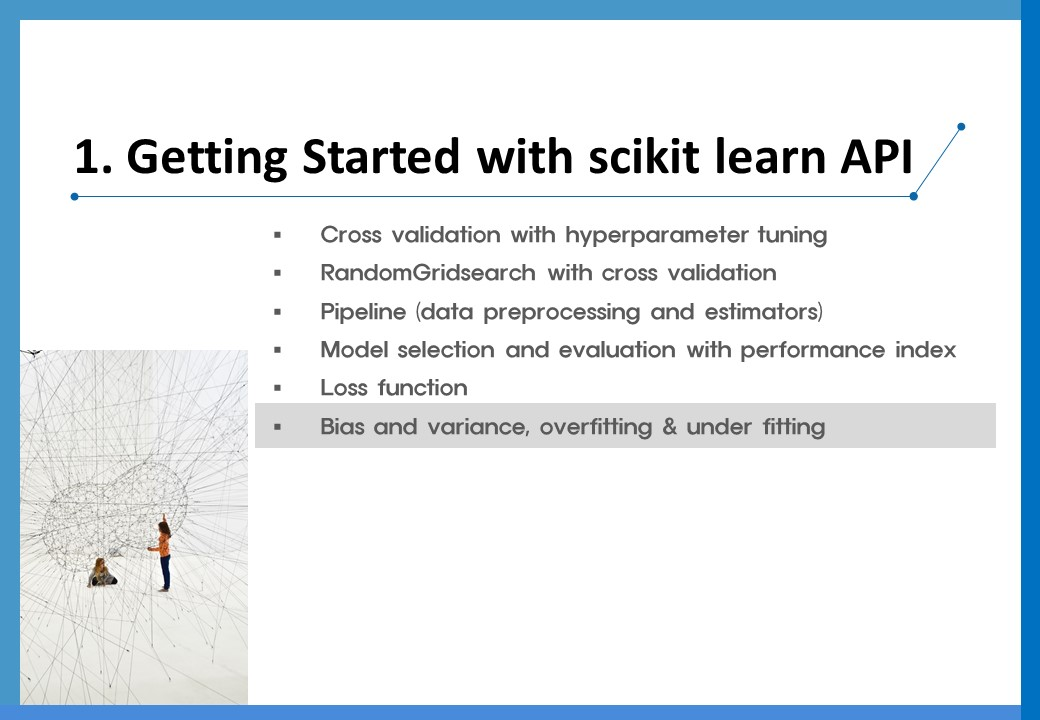

In [20]:
Image(filename=dir_path + '/슬라이드51.jpg', width=width, height=height)

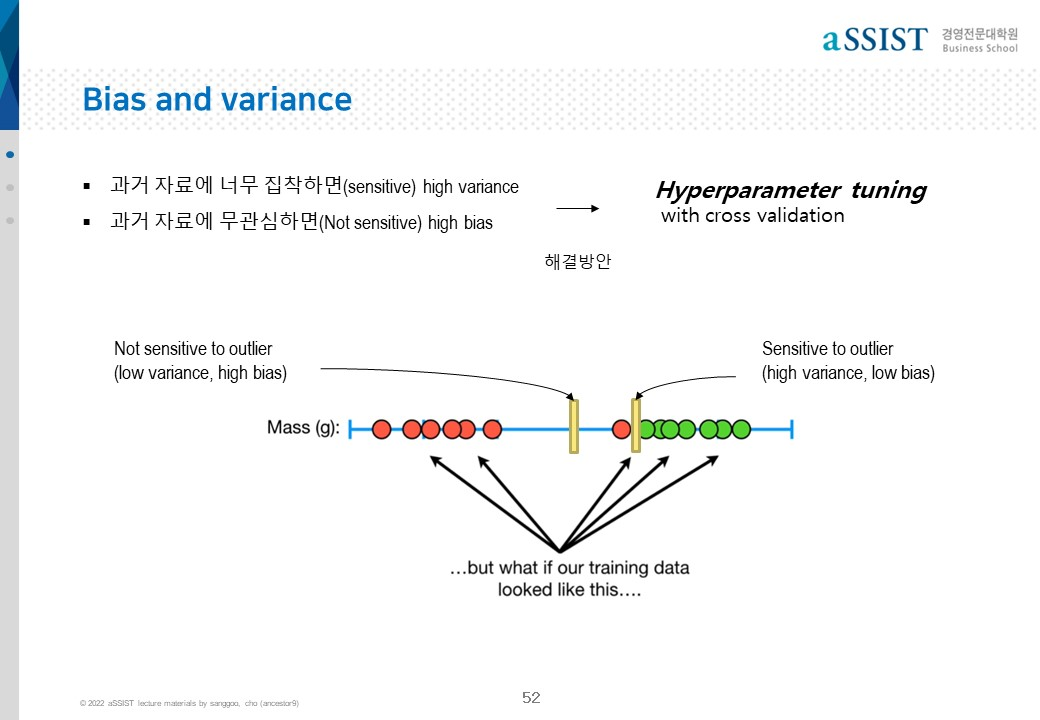

In [21]:
Image(filename=dir_path + '/슬라이드52.jpg', width=width, height=height)

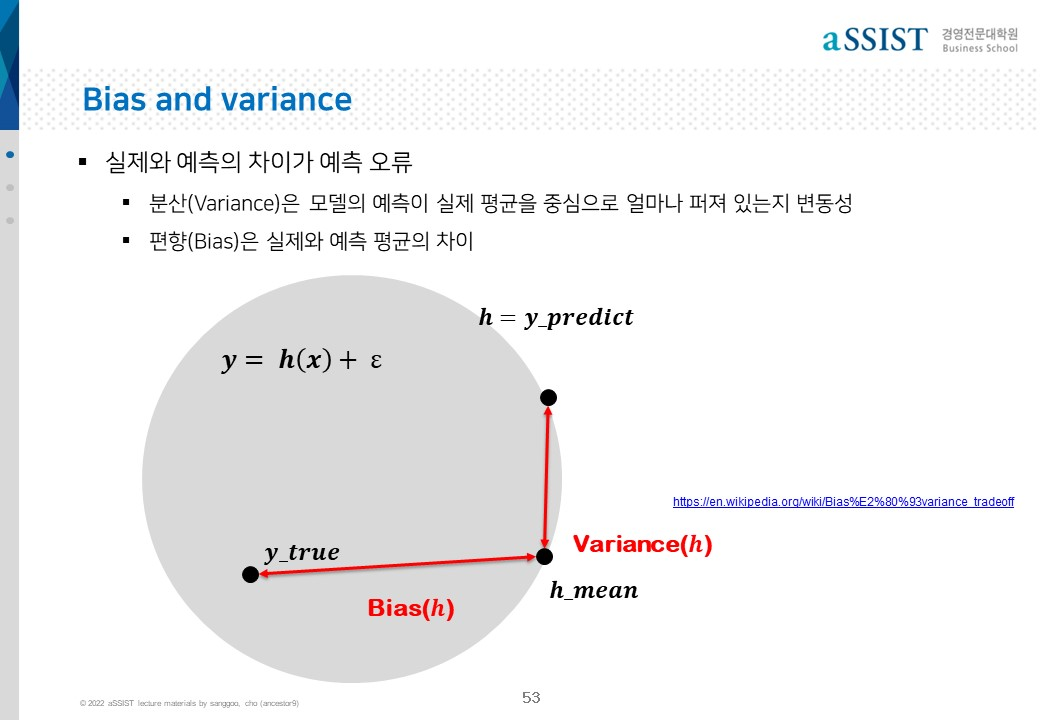

In [22]:
Image(filename=dir_path + '/슬라이드53.jpg', width=width, height=height)

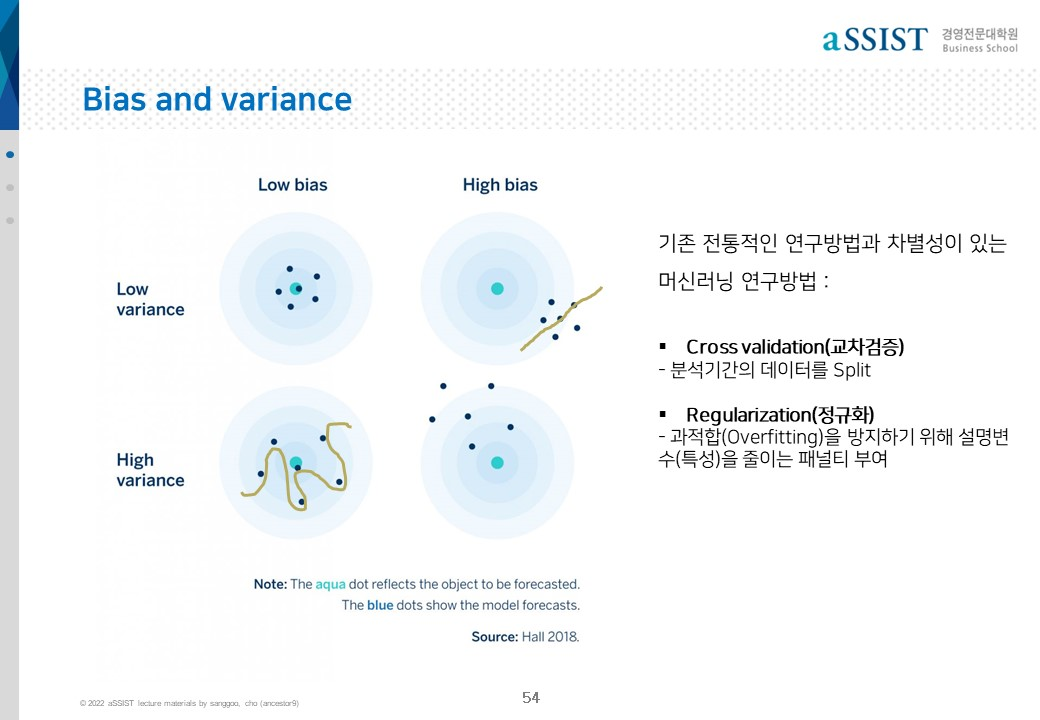

In [23]:
Image(filename=dir_path + '/슬라이드54.jpg', width=width, height=height)

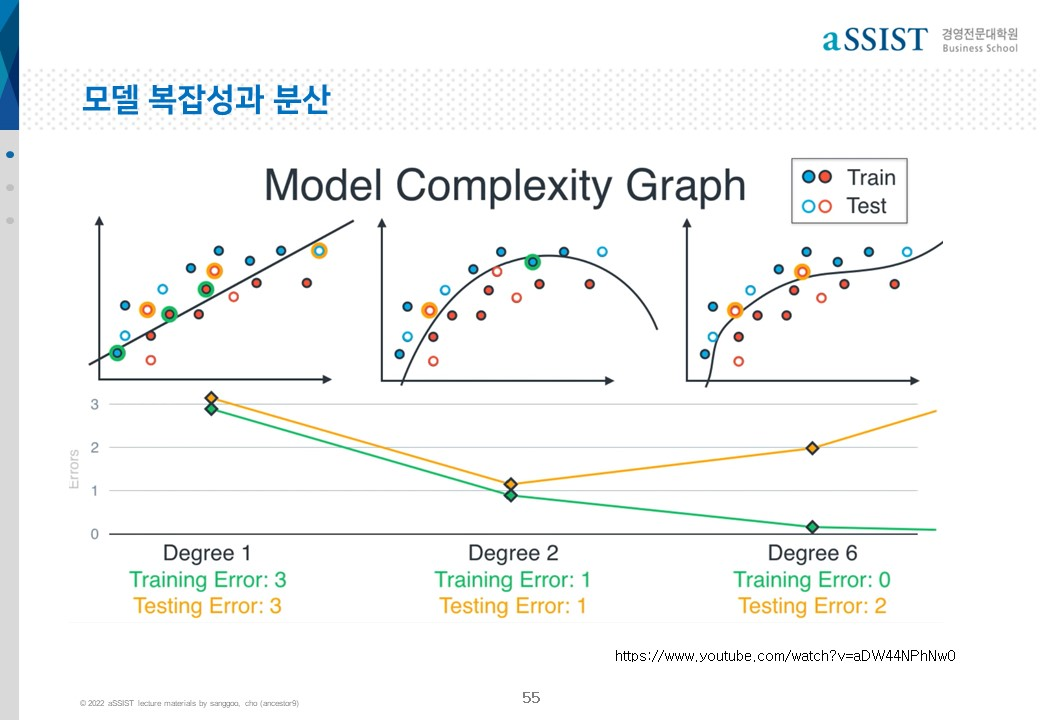

In [24]:
Image(filename=dir_path + '/슬라이드55.jpg', width=width, height=height)

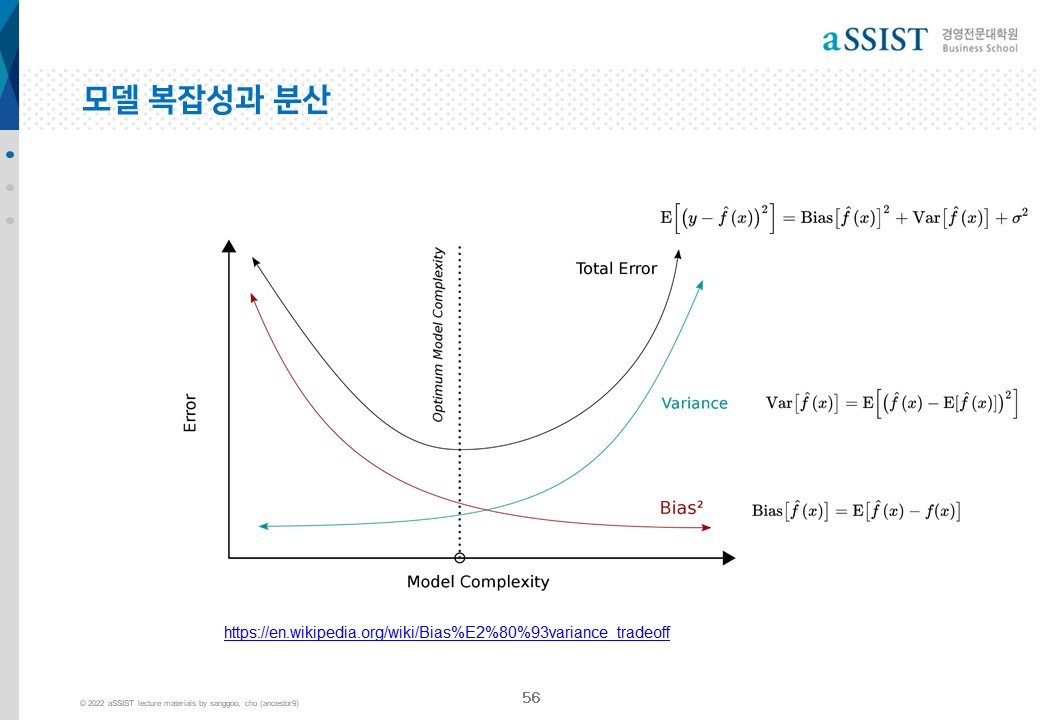

In [25]:
Image(filename=dir_path + '/슬라이드56.jpg', width=width, height=height)

In [26]:
from sklearn.metrics import accuracy_score
for neibors in [1,5,10,15,20,25,30,50]:
    naver = KNeighborsClassifier(n_neighbors=neibors)
    y_pred = naver.fit(X,y).predict(X)
    print(f'{clf}알고리즘의 예측 모형정확도 {accuracy_score(y_pred, y).round(2)}') # 정확도(Accuracy)

RandomForestClassifier(random_state=0)알고리즘의 예측 모형정확도 1.0
RandomForestClassifier(random_state=0)알고리즘의 예측 모형정확도 0.93
RandomForestClassifier(random_state=0)알고리즘의 예측 모형정확도 0.96
RandomForestClassifier(random_state=0)알고리즘의 예측 모형정확도 0.94
RandomForestClassifier(random_state=0)알고리즘의 예측 모형정확도 0.95
RandomForestClassifier(random_state=0)알고리즘의 예측 모형정확도 0.94
RandomForestClassifier(random_state=0)알고리즘의 예측 모형정확도 0.93
RandomForestClassifier(random_state=0)알고리즘의 예측 모형정확도 0.93


KNeighborsClassifier(n_neighbors=1)

<AxesSubplot:>

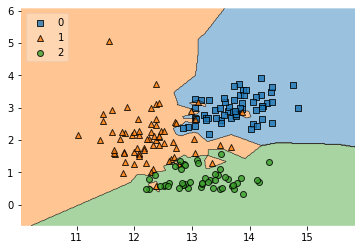

KNeighborsClassifier(n_neighbors=20)

<AxesSubplot:>

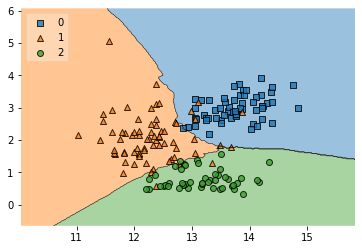

KNeighborsClassifier(n_neighbors=30)

<AxesSubplot:>

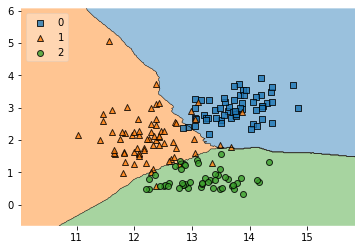

KNeighborsClassifier(n_neighbors=50)

<AxesSubplot:>

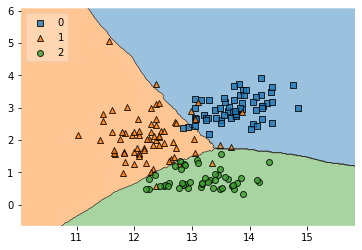

KNeighborsClassifier(n_neighbors=100)

<AxesSubplot:>

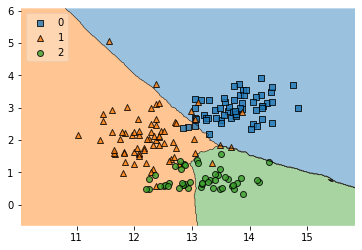

In [27]:
from mlxtend.plotting import plot_decision_regions # 2차원 특성변수의 분류경계선을 시각

for neibors in [1,20,30,50, 100]:
    naver = KNeighborsClassifier(n_neighbors=neibors)
    naver.fit(X,y)
    plot_decision_regions(X.values, y.values, clf=naver, legend=2); plt.show()

# Peril of overfitting

### Figure 1. Sick (blue) and healthy (orange) trees.
<img src='https://developers.google.com/machine-learning/crash-course/images/GeneralizationA.png' width=300 height=300>

### Figure 2. A complex model for distinguishing sick from healthy trees.
- At first glance, the model shown in Figure 2 appeared to do an excellent job of separating the healthy trees from the sick ones. Or did it?
<img src='https://developers.google.com/machine-learning/crash-course/images/GeneralizationB.png' width=300 height=300>

### Figure 3. The model did a bad job predicting new data.
- The model shown in Figures 2 and 3 overfits the peculiarities of the data it trained on. An overfit model gets a low loss during training but does a poor job predicting new data. If a model fits the current sample well, how can we trust that it will make good predictions on new data? 
<img src='https://developers.google.com/machine-learning/crash-course/images/GeneralizationC.png' width=300 height=300>

William of Ockham, a 14th century friar and philosopher, loved simplicity. He believed that scientists should prefer simpler formulas or theories over more complex ones. To put Ockham's razor in machine learning terms:
The less complex an ML model, the more likely that a good empirical result is not just due to the peculiarities of the sample.

In modern times, we've formalized Ockham's razor into the fields of statistical learning theory and computational learning theory. These fields have developed generalization bounds--a statistical description of a model's ability to generalize to new data based on factors such as:

- 1. the complexity of the model
- 2. the model's performance on training data

### Slicing a single data set into a training set and test set.
<img src = 'https://developers.google.com/machine-learning/crash-course/images/TrainingDataVsTestData.svg'>

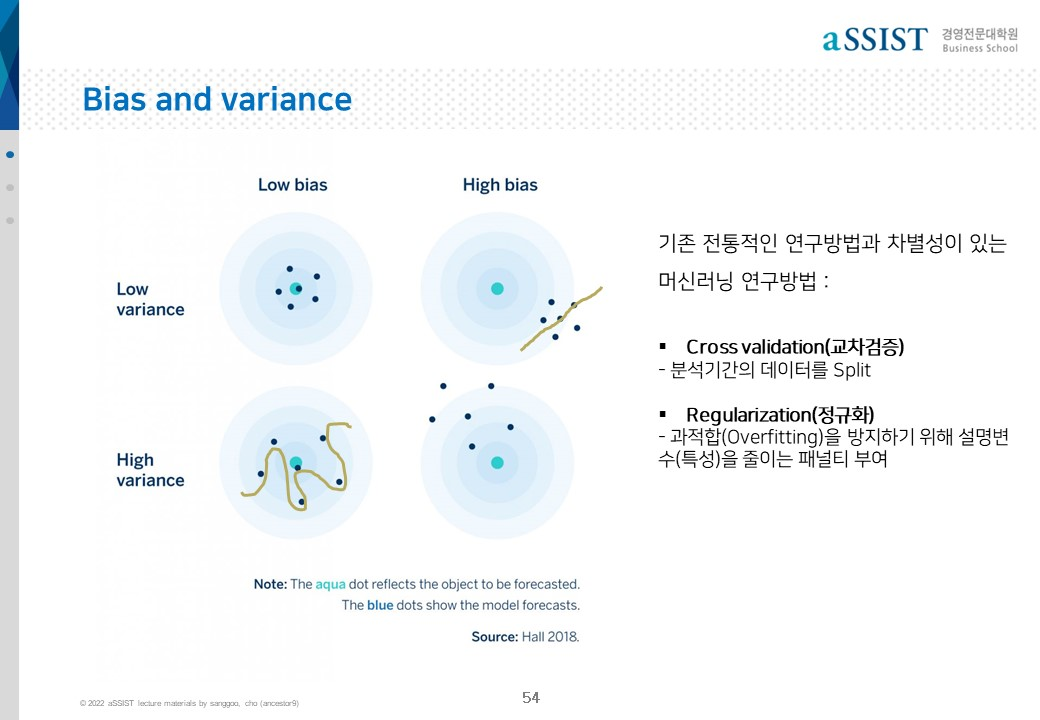

In [28]:
Image(filename=dir_path + '/슬라이드54.jpg', width=width, height=height)

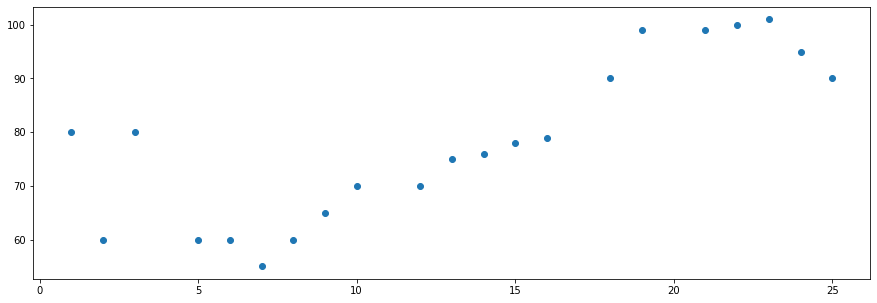

In [29]:
plt.rcParams["figure.figsize"] = (15,5)
x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22,23,24,25]
y = [80,60,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100,101,95,90]

plt.scatter(x, y)
plt.show()

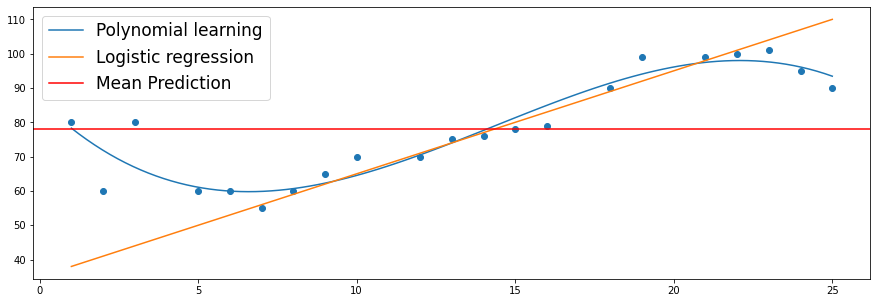

In [30]:
myline = np.linspace(1, 25, 100)
polymodel = np.poly1d(np.polyfit(x, y, 3))
regy = 35 + myline*3
plt.scatter(x, y)
plt.plot(myline, polymodel(myline), label = 'Polynomial learning')
plt.plot(myline, regy, label = 'Logistic regression')
plt.axhline(y = np.mean(y), label = 'Mean Prediction', color = 'r', linestyle = '-')
#plt.axhline(y = np.mean(y), label = '평균예측')
plt.legend(fontsize='17')
plt.show()

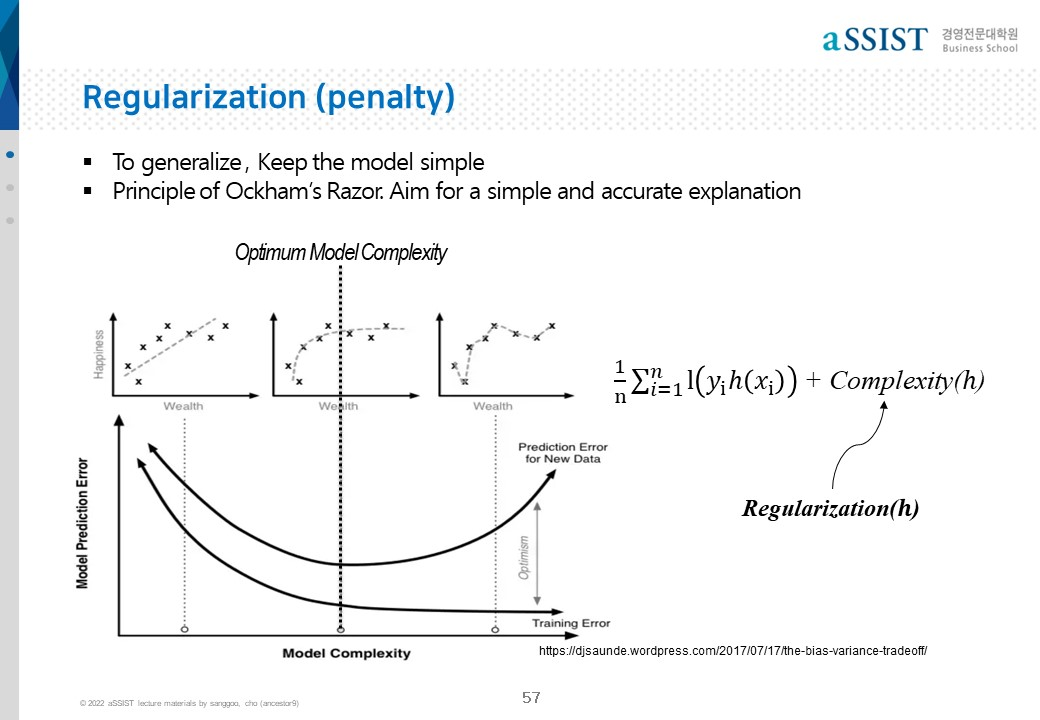

In [31]:
Image(filename=dir_path + '/슬라이드57.jpg', width=width, height=height)

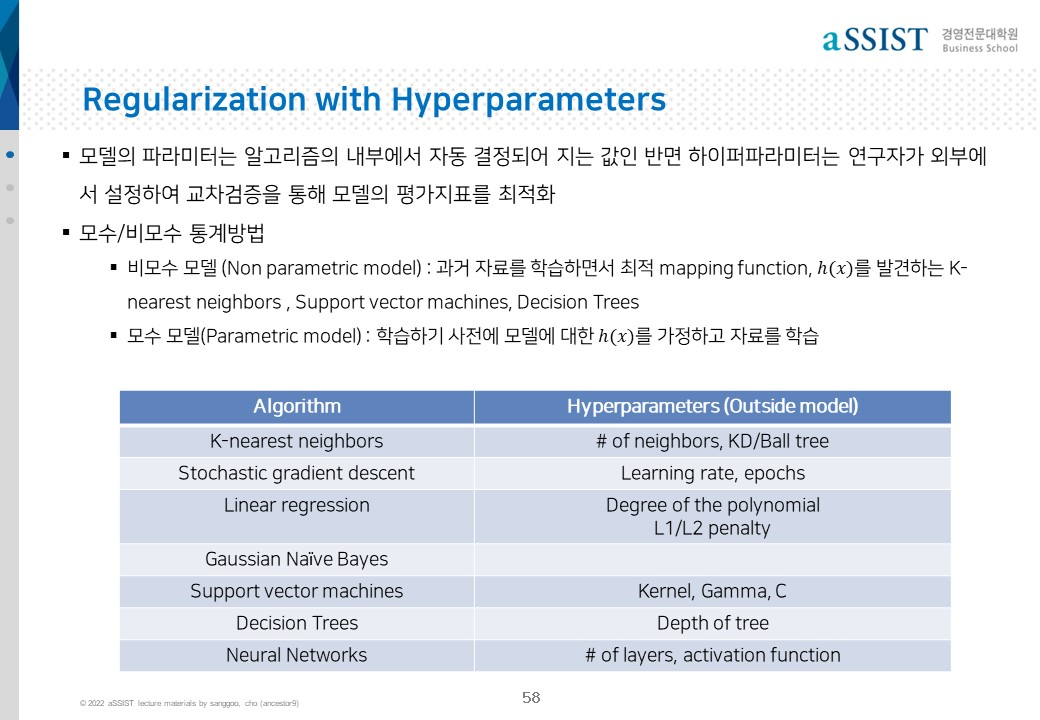

In [32]:
Image(filename=dir_path + '/슬라이드58.jpg', width=width, height=height)

# End